# Classification Model for Predicting Liver Patients

The goal of this project is predict the liver patient based on 10 features already available in the dataset. The model will help doctors to early diagnose the patient and propose a treatment.

Common Liver Disorder
1. Hepatitis: 
It is an ailment produced by a virus feast due to manure pollution or direct interaction with the septic bloody fluids.

2. Cirrhosis:
It is the utmost severe liver disease that happens when normal liver cells are swapped by mutilation.

3. Liver Cancer:
The danger of consuming liver cancer is higher for individuals who have cirrhosis and another type of hepatitis.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
%matplotlib inline

The data that going to be used is obtained from keggle community. There are 10 features that can be used that includes age, gender, Bilirubin, protein, albumin, alkphos and more. The goal is to create a model that can predicted the possible liver patient. To reach this conclusion, I will use classification and apply all the required procedures to reach my goal.

# Exploring the Dataset:

In [3]:
df = pd.read_csv('Data/LDP.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4   �Alkphos Alkaline Phosphotase         29895 non-null  float64
 5   �Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8   �ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [5]:
df.tail(3)

Age of the patient Gender of the patient  Total Bilirubin  \
30688                54.0                  Male              6.8   
30689                48.0                Female              1.9   
30690                30.0                  Male              3.1   

       Direct Bilirubin  �Alkphos Alkaline Phosphotase  \
30688               3.0                          542.0   
30689               1.0                          231.0   
30690               1.6                          253.0   

       �Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
30688                           116.0                             66.0   
30689                            16.0                             55.0   
30690                            80.0                            406.0   

       Total Protiens  �ALB Albumin  A/G Ratio Albumin and Globulin Ratio  \
30688             6.4           3.1                                   0.9   
30689             4.3           1.6                                   0.6   
30690             6.8           3.9                                   1.3   

       Result  
30688       1  
30689       1  
30690       1

In [6]:
# Fix column Names by passing a list of names
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
              'Alanine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',
              'Albumin', 'Albumin_and_Globulin_Ratio', 'Result']


In [8]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alanine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')

## DATA:

### 1.1 Understanding The Terms
In order to have a clear understanding of the data we need to go over the medical terminology and explain the dataset. This dataset has more than 29,000 rows. 

1. **Age:**  Age of the patient
2. **Gender:** Male, Female
3. **Total Bilirubin:** High bilirubin levels can **cause jaundice**
4. **Direct Bilirubin:** bilirubin is changed into a form that **your body can get rid of**. This is called conjugated bilirubin or direct bilirubin
5. **Alkphos Alkaline Phosphotase:** High alkaline phosphatase levels may mean **there is damage to your liver** 
6. **Sgpt Alamine Aminotransferase:** exists predominantly in the  liver and leaks into the bloodstream when produced in excess. The SGPT  normal range is about 7 to 56 units per liter of blood serum. Thus, very high level of SGPT in **the blood can be an indication of damage**
7. **Sgot Aspartate Aminotransferase:** A high AST level is **a sign of liver damage**, but it can also mean you have damage to another organ that makes it
8. **Total Proteins:** Usually, the amount of total  protein in your blood is relatively stable. High blood protein may be a  symptom of underlying medical conditions. 
9. **ALB Albumin:**Albumin maintains the fluid balance in the body. It helps prevent the blood vessels from leaking too much
10. **A/G Ratio Albumin and Globulin Ratio:**
11. **Result:** this column has two values (1) Liver Patient, (2) non-Liver Patient.

Number of records: 30691
Number of patients likely to have liver disease 21917
Number of patients unlikely to have liver disease 8774
Percentage of patients likely to have liver disease 71.41181453846404%


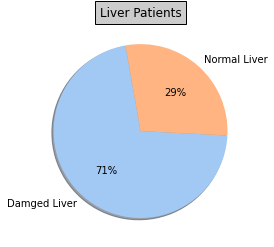

In [9]:
# Checking the amount of patients with LD and check the imbalance
import seaborn as sns
import matplotlib.pyplot as plt

num_records = len(df.index)
num_records_liv_pos = len(df[df['Result'] == 1])
num_records_liv_neg = len(df[df['Result'] == 2])
percent_liver_disease_pos = (num_records_liv_pos/num_records)*100

print("Number of records: {}".format(num_records))
print("Number of patients likely to have liver disease {}".format(num_records_liv_pos))
print("Number of patients unlikely to have liver disease {}".format(num_records_liv_neg))
print("Percentage of patients likely to have liver disease {}%".format(percent_liver_disease_pos))

# sns.countplot(data=df, x = 'Result', label='Count')


#define data
data = [num_records_liv_pos, num_records_liv_neg]
labels = ['Damged Liver', 'Normal Liver']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', shadow=True, startangle=100)
plt.title("Liver Patients", bbox={'facecolor':'0.8', 'pad':5})


plt.show()

In [10]:
df.shape

(30691, 11)

In [18]:
# Drop all null rows
df1 = df.dropna()
df1.reset_index(drop=True, inplace=True)

In [19]:
df1.shape

(27158, 11)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27158 entries, 0 to 27157
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         27158 non-null  float64
 1   Gender                      27158 non-null  object 
 2   Total_Bilirubin             27158 non-null  float64
 3   Direct_Bilirubin            27158 non-null  float64
 4   Alkaline_Phosphotase        27158 non-null  float64
 5   Alanine_Aminotransferase    27158 non-null  float64
 6   Aspartate_Aminotransferase  27158 non-null  float64
 7   Total_Protiens              27158 non-null  float64
 8   Albumin                     27158 non-null  float64
 9   Albumin_and_Globulin_Ratio  27158 non-null  float64
 10  Result                      27158 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.3+ MB


In [21]:
# Checking if there is some null values or not
df1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Result                        0
dtype: int64

In [22]:
from pandas_profiling import ProfileReport

In [36]:
prof = ProfileReport(df1, title= "Liver Patients Profile")

For a better understanding I have used Pandas Prifiling to create a profile of the dataset. 

In [37]:
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

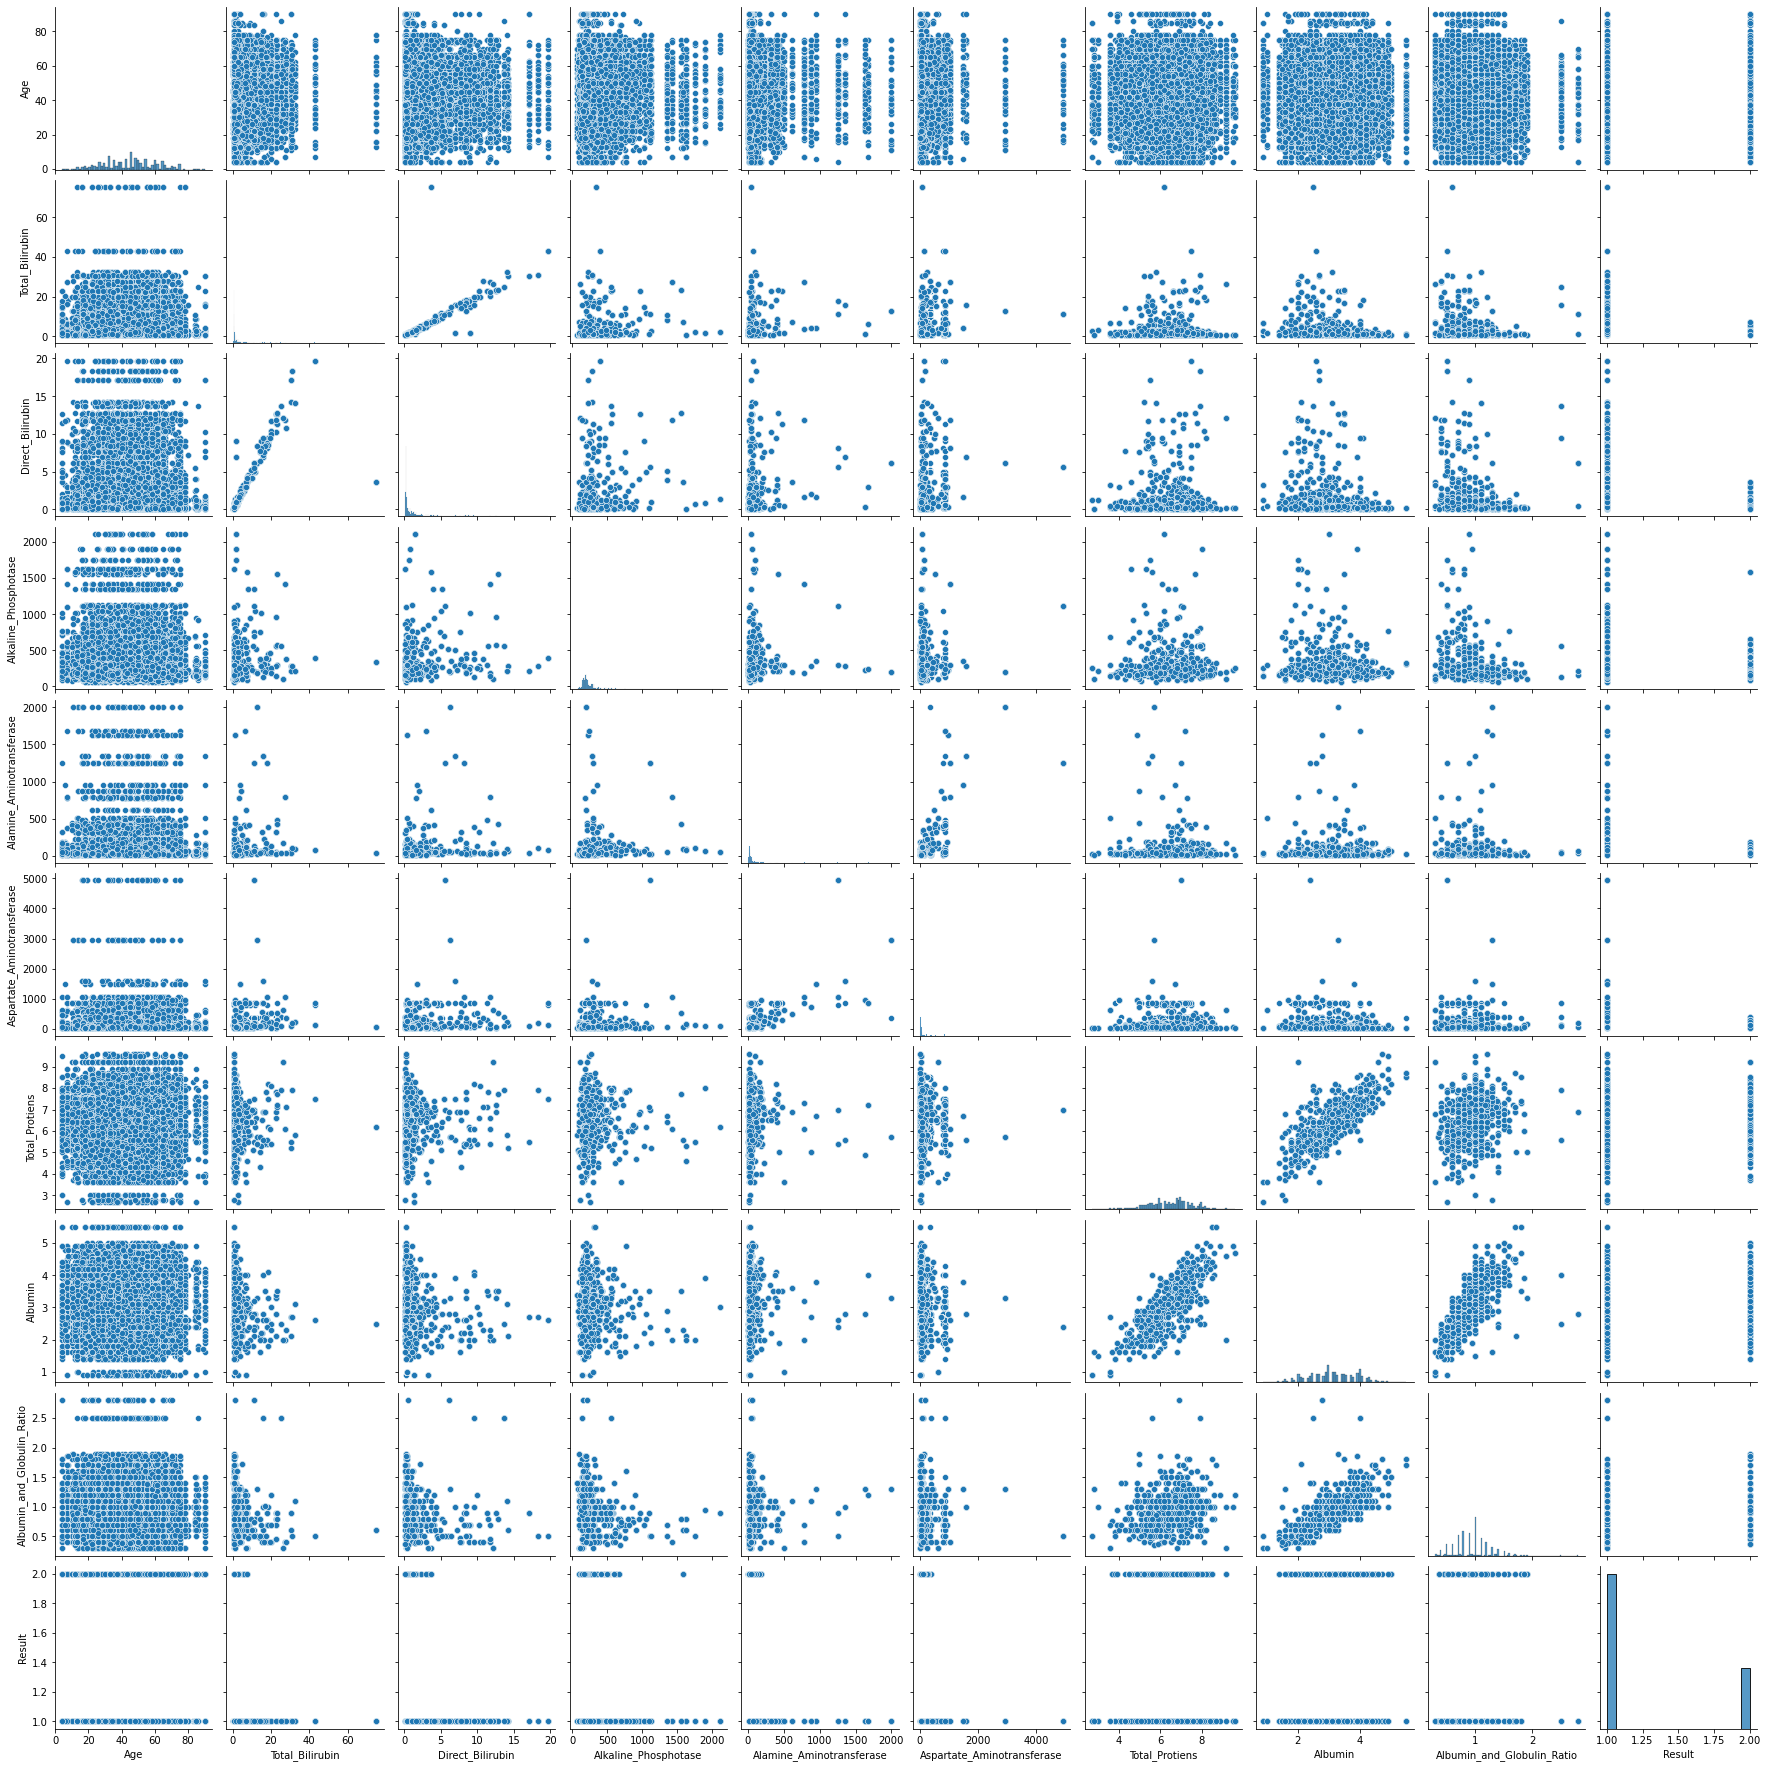

In [20]:
import seaborn as sns
sns.pairplot(df1)


In [24]:
df1['Gender'].replace({'Female':0 ,'Male': 1, 'female':0 , 'male':1 ,'F':0, 'M':1 ,'f':0 ,'m':1},inplace=True)

In [25]:
df1.head(5)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  65.0       0              0.7               0.1                 187.0   
1  62.0       1             10.9               5.5                 699.0   
2  62.0       1              7.3               4.1                 490.0   
3  58.0       1              1.0               0.4                 182.0   
4  72.0       1              3.9               2.0                 195.0   

   Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                      16.0                        18.0             6.8   
1                      64.0                       100.0             7.5   
2                      60.0                        68.0             7.0   
3                      14.0                        20.0             6.8   
4                      27.0                        59.0             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Result  
0      3.3                        0.90       1  
1      3.2                        0.74       1  
2      3.3                        0.89       1  
3      3.4                        1.00       1  
4      2.4                        0.40       1

## Data Scaling:
In this section we need to scale the data 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop('Result',axis=1))
scaled_features = scaler.transform(df1.drop('Result',axis=1))
liver_scaled = pd.DataFrame(scaled_features,columns=df1.columns[:-1])
liver_scaled.head()



Age    Gender  Total_Bilirubin  Direct_Bilirubin  \
0  1.307032 -1.676957        -0.427630         -0.497967   
1  1.119194  0.596318         1.183142          1.367298   
2  1.119194  0.596318         0.614634          0.883711   
3  0.868745  0.596318        -0.380254         -0.394341   
4  1.745319  0.596318         0.077710          0.158330   

   Alkaline_Phosphotase  Alanine_Aminotransferase  Aspartate_Aminotransferase  \
0             -0.430492                 -0.359530                   -0.331803   
1              1.706483                 -0.095167                   -0.042674   
2              0.834163                 -0.117197                   -0.155505   
3             -0.451361                 -0.370546                   -0.324751   
4             -0.397102                 -0.298947                   -0.187239   

   Total_Protiens   Albumin  Albumin_and_Globulin_Ratio  
0        0.302735  0.222078                   -0.134383  
1        0.950010  0.095865                   -0.627908  
2        0.487671  0.222078                   -0.165229  
3        0.302735  0.348290                    0.174070  
4        0.765074 -0.913835                   -1.676648

# Classification:

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# create X (features) and y (response)
X=liver_scaled
y=df1['Result']


In [28]:
from sklearn.model_selection import train_test_split
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3)


In [29]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)


(17380, 10)
(5432, 10)


In [42]:
# search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score
k_range = list(range(1, 10))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print (f'The maximum scors is {max(k_scores)} and the K is {k_scores.index(max(k_scores))+1}')

[0.9676883084634035, 0.9449965633816662, 0.937171858036729, 0.9197271850493965, 0.9128692881581166, 0.8987386636088817, 0.8938597249518832, 0.8825831462473908, 0.8774742168874832]
The maximum scors is 0.9676883084634035 and the K is 1


In [31]:
# search for an optimal value of K for KNN
k_range = 30
k_scores = []
knn = KNeighborsClassifier(n_neighbors=k)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
k_scores.append(scores.mean())
print(k_scores)
print (f'The maximum scors is {max(k_scores)} and the K is {k_scores.index(max(k_scores))+1}')

[0.9025891829689299]
The maximum scors is 0.9025891829689299 and the K is 1


In [41]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(classification_report(y_test,knn_predictions))



WITH K=30


              precision    recall  f1-score   support

           1       0.97      0.97      0.97      3900
           2       0.92      0.92      0.92      1532

    accuracy                           0.96      5432
   macro avg       0.95      0.94      0.95      5432
weighted avg       0.96      0.96      0.96      5432



Text(0, 0.5, 'Cross-Validated Accuracy')

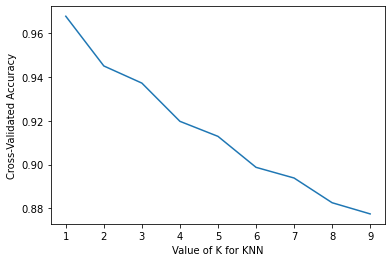

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#  Logistic Regression:


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix


In [35]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
lg_predictions=lg.predict(X_test)

In [36]:
lg_acc=accuracy_score(y_test,lg_predictions)
lg_prec=precision_score(y_test,lg_predictions)
lg_rec=recall_score(y_test,lg_predictions)
lg_f1=f1_score(y_test,lg_predictions)
lg_mas=mean_absolute_error(y_test,lg_predictions)
lg_rms=np.sqrt(mean_squared_error(y_test,lg_predictions))

In [39]:
print(classification_report(y_test,lg_predictions))

              precision    recall  f1-score   support

           1       0.75      0.93      0.83      3900
           2       0.55      0.20      0.29      1532

    accuracy                           0.73      5432
   macro avg       0.65      0.57      0.56      5432
weighted avg       0.69      0.73      0.68      5432

